In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\data\Flight_Booking\Flight_Booking.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
data.duplicated().any()

False

In [6]:
# Finding out the count of the airlines

data['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
data['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [8]:
data['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [9]:
data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
data['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [11]:
data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: >

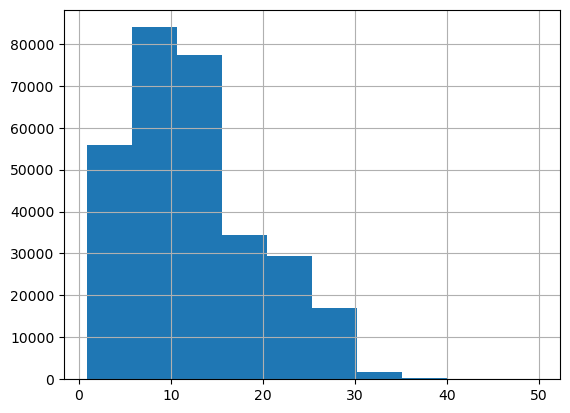

In [12]:
data['duration'].hist()

In [13]:
data['days_left'].nunique()

49

<Axes: >

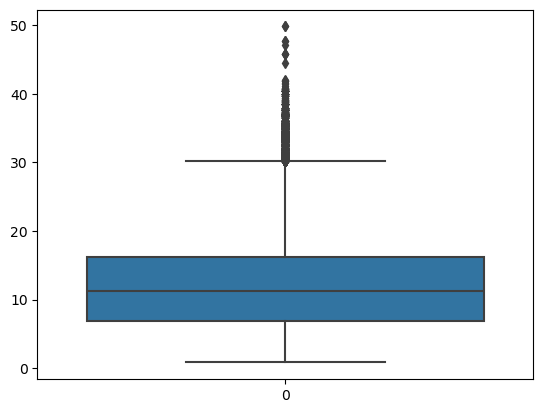

In [14]:
sns.boxplot(data['duration'])

In [15]:
# Checking for outliers

Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
    
iqr = Q3-Q1
    
Ul = Q3 + 1.5*iqr
ll = Q1 - 1.5*iqr 
    
    
data[(data['duration'] < ll) | (data['duration'] > Ul)]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,10534,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,4,12222
10535,10535,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,4,12222
10540,10540,Air_India,AI-9887,Delhi,Early_Morning,two_or_more,Evening,Bangalore,Economy,36.92,4,12321
10891,10891,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,31.25,6,12222
10892,10892,Vistara,UK-706,Delhi,Afternoon,two_or_more,Night,Bangalore,Economy,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...,...,...
296064,296064,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,5,55377
296297,296297,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,10,55377
296391,296391,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,12,55377
296716,296716,Air_India,AI-440,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,30.33,19,55377


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int32  
 2   flight            300153 non-null  int32  
 3   source_city       300153 non-null  int32  
 4   departure_time    300153 non-null  int32  
 5   stops             300153 non-null  int32  
 6   arrival_time      300153 non-null  int32  
 7   destination_city  300153 non-null  int32  
 8   class             300153 non-null  int32  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(3)
memory usage: 18.3 MB


In [18]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [19]:
data.drop('Unnamed: 0',axis=1,inplace=True)

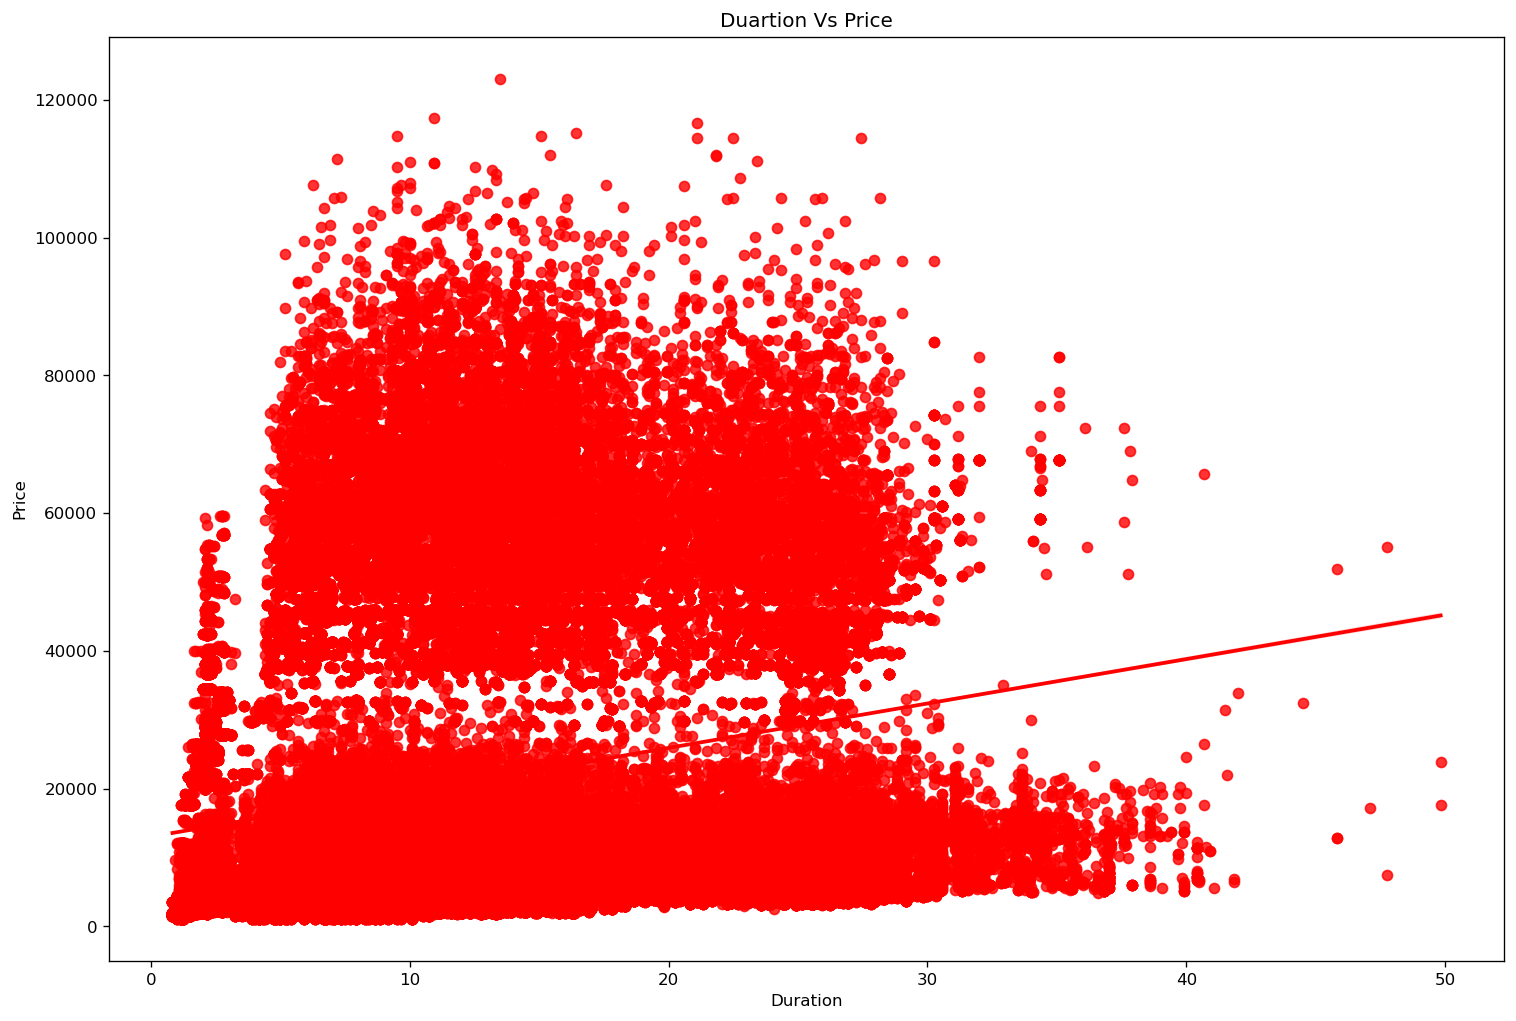

In [20]:
plt.figure(figsize=(15,10),dpi=120)
sns.regplot(x=data['duration'],y=data['price'],color='red')
plt.title("Duartion Vs Price")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

* Some waht linearity can be seen between duration and price.

## Feature Selection 

### We will use Variation Inflation Factor in order to check multicollinearity. 

#### Multicollinearity - High correlation between independent variables.

In [21]:
x = data.drop('price',axis=1)
y = data['price']

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = 1 / 1 - R^2

In [23]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [24]:
x.drop('flight',axis=1,inplace=True)

In [25]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


### Ordinary Least Square Method 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, random_state=42)

In [29]:
x = scaler.fit_transform(X_train)

In [30]:
import statsmodels.api as sm

In [31]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [32]:
# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

In [33]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [34]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.213e+05
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:29:09   Log-Likelihood:            -2.1587e+06
No. Observations:              210107   AIC:                         4.317e+06
Df Residuals:                  210097   BIC:                         4.318e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.058e+04     80.477  

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 49071365.66
Mean Absolute Error on Test Data: 4626.1
Root Mean Squared Error on Test Data: 7005.1


* We have recieved high R2 value of 0.90 indicating the variance explained by the independent variables.

* RMSE value  of 7005 indicate the magnititude of error in the model. Lesser the error better the model.

### Linear Regression Method 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
lr.coef_

array([ 0.00000000e+00,  9.55445260e+02,  1.06096285e+02,  3.62766466e+01,
       -3.28544535e+03,  1.87192946e+02,  1.21600783e+02, -4.45616499e+04,
        9.34020314e+01, -1.31637867e+02])

In [39]:
predictions_lr = lr.predict(X_test)

In [40]:
predictions_lr

array([ 4582.69078161, 52858.86295317,  7883.42638552, ...,
       -1897.26871277,  6032.94399587, -3472.23525258])

In [41]:
mse = mean_squared_error(y_test, predictions_lr)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions_lr)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 49071365.66
Mean Absolute Error on Test Data: 4626.1
Root Mean Squared Error on Test Data: 7005.1


### Checking the assumptions of Linear Regression

1. Residuals

In [42]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                              'predictions':predictions})
residual_table = residual_table.sort_values( by ='predictions')

In [43]:
residual_table

,residuals,predictions
197549,-7960.846787,-6517.846787
115336,-8120.656935,-6406.656935
61371,-8441.508527,-6317.508527
170399,-8089.126379,-6313.126379
197636,-7725.570925,-6282.570925
...,...,...
206694,-15158.419508,59481.580492
264010,-26726.163789,59608.836211
206696,-14948.264937,59691.735063
264003,-16386.588579,59756.411421


In [44]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

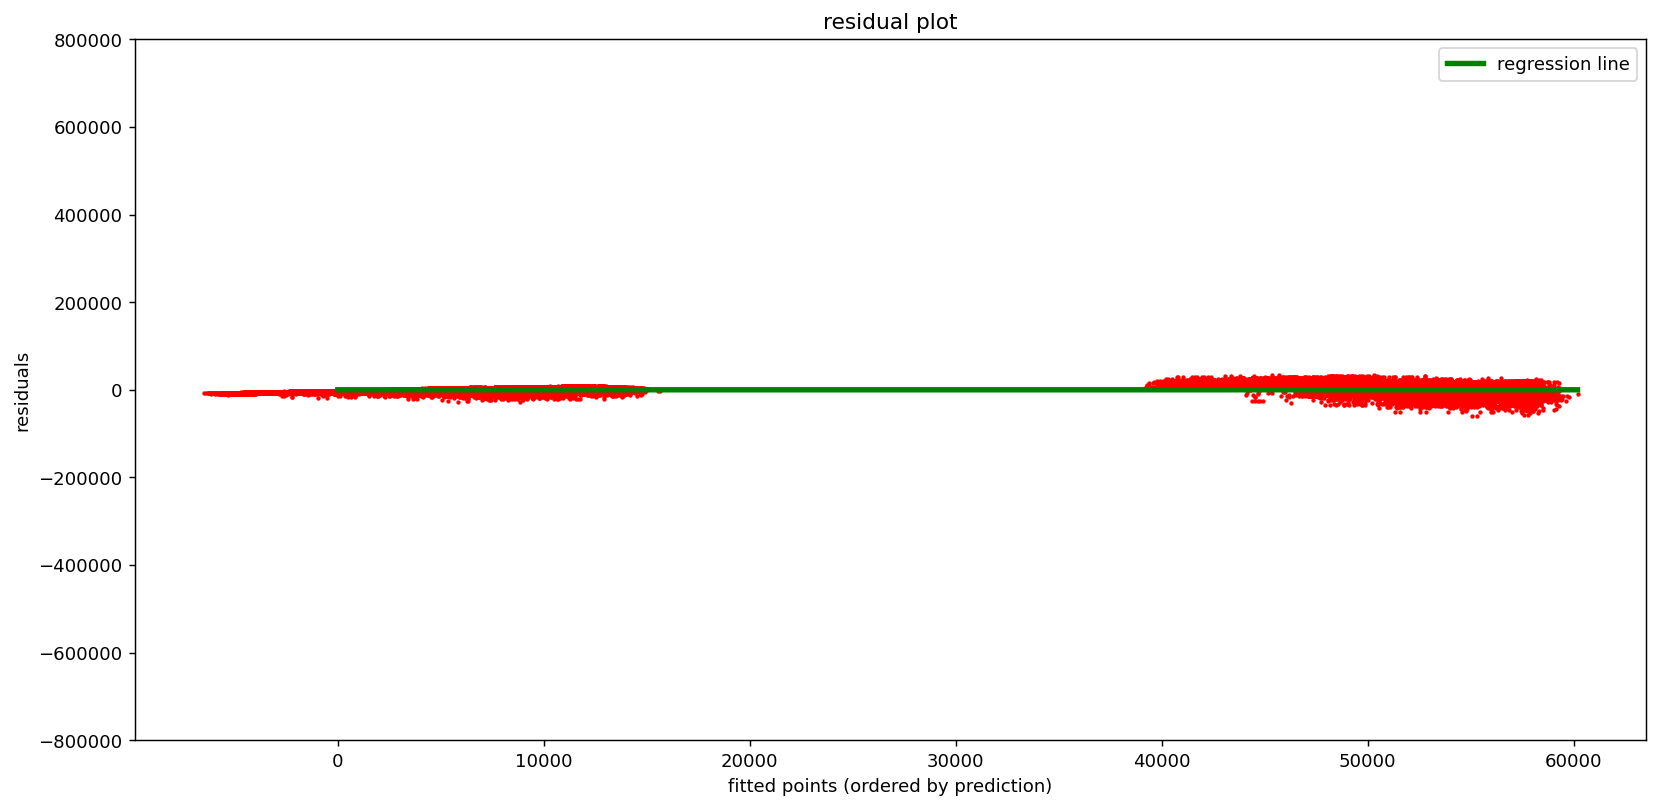

In [45]:
plt.figure(dpi = 130, figsize = (15,7))

plt.scatter(residual_table['predictions'], residual_table['residuals'],color ='red',s=2)
plt.plot(z,k,color = 'green', linewidth = 3, label ='regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by prediction)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

2. Distribution of errors 

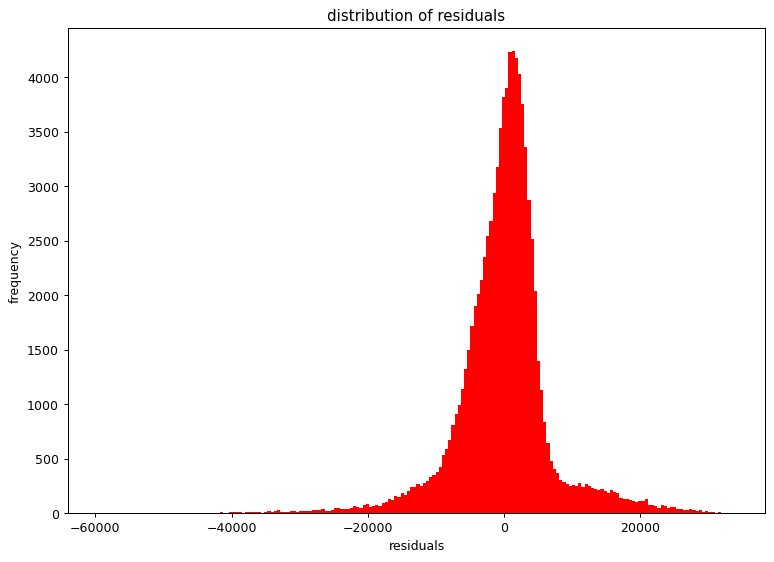

In [46]:
plt.figure(dpi = 90,figsize = (10,7))
plt.hist(residual_table['residuals'], color ='red',bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

3. Model Coefficients 

In [47]:
X_train = pd.DataFrame(X_train)

In [48]:
coefficients_table = pd.DataFrame({'column': X_train.columns,
                                  'coefficients':lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

In [49]:
print(coefficient_table)

             column  coefficients
7             class -44561.649879
4             stops  -3285.445353
9         days_left   -131.637867
0             const      0.000000
3    departure_time     36.276647
8          duration     93.402031
2       source_city    106.096285
6  destination_city    121.600783
5      arrival_time    187.192946
1           airline    955.445260


### Running linear regrssion without outliers 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


In [52]:
# Checking for outliers

Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
    
iqr = Q3-Q1
    
Ul = Q3 + 1.5*iqr
ll = Q1 - 1.5*iqr 
    
    
data[(data['duration'] < ll) | (data['duration'] > Ul)]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10534,5,1442,2,0,1,5,0,1,31.25,4,12222
10535,5,1442,2,0,1,5,0,1,33.17,4,12222
10540,1,906,2,1,1,2,0,1,36.92,4,12321
10891,5,1442,2,0,1,5,0,1,31.25,6,12222
10892,5,1442,2,0,1,5,0,1,33.17,6,12222
...,...,...,...,...,...,...,...,...,...,...,...
296064,1,722,1,1,0,0,4,0,30.33,5,55377
296297,1,722,1,1,0,0,4,0,30.33,10,55377
296391,1,722,1,1,0,0,4,0,30.33,12,55377
296716,1,722,1,1,0,0,4,0,30.33,19,55377


<Axes: >

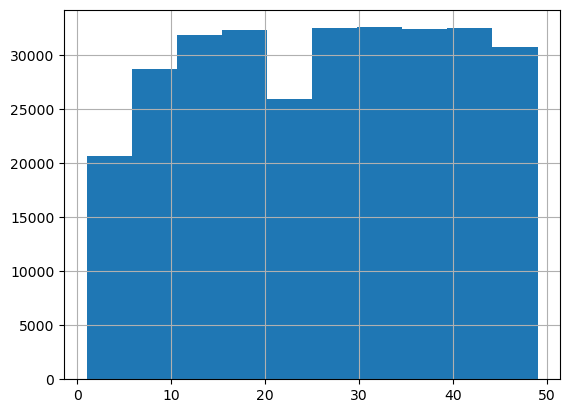

In [53]:
data['days_left'].hist()

In [55]:
data = data[(data['duration'] >= ll) & (data['duration'] <= Ul)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298043 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           298043 non-null  int32  
 1   flight            298043 non-null  int32  
 2   source_city       298043 non-null  int32  
 3   departure_time    298043 non-null  int32  
 4   stops             298043 non-null  int32  
 5   arrival_time      298043 non-null  int32  
 6   destination_city  298043 non-null  int32  
 7   class             298043 non-null  int32  
 8   duration          298043 non-null  float64
 9   days_left         298043 non-null  int64  
 10  price             298043 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 18.2 MB


In [56]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [57]:
x = data.drop('price',axis=1)
y = data['price']

In [58]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,airline,6.689526
1,flight,12.669710
2,source_city,2.986146
3,departure_time,2.827307
4,stops,1.465243
5,arrival_time,3.788617
6,destination_city,2.924536
7,class,2.838307
8,duration,5.002244
9,days_left,4.086181


In [59]:
x.drop('flight',axis=1,inplace=True)

In [60]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,airline,3.410496
1,source_city,2.947244
2,departure_time,2.803678
3,stops,1.452100
4,arrival_time,3.690991
5,destination_city,2.892704
6,class,2.835827
7,duration,4.316142
8,days_left,3.995633


In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, random_state=42)

In [62]:
x = scaler.fit_transform(X_train)

In [63]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [64]:
# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

In [65]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [66]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.202e+05
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:18:20   Log-Likelihood:            -2.1436e+06
No. Observations:              208630   AIC:                         4.287e+06
Df Residuals:                  208620   BIC:                         4.287e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.064e+04     80.950  

In [67]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 49375981.2
Mean Absolute Error on Test Data: 4659.04
Root Mean Squared Error on Test Data: 7026.8


* As we can see that droping the outliers has not decresed the errors. Therfore we have to consider the outliers in our analysis.

### Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42)

In [71]:
# Train the model on the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [72]:
# Make predictions on the test data
predictions = rf_reg.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Data: {round(mse, 2)}')

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error on Test Data: {round(mae, 2)}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error on Test Data: {round(rmse, 2)}')

Mean Squared Error on Test Data: 7745375.33
Mean Absolute Error on Test Data: 1109.83
Root Mean Squared Error on Test Data: 2783.05


In [75]:
# Checking the performance on training data.

predictions_train = rf_reg.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
print(f'Mean Squared Error on Test Data: {round(mse_train, 2)}')

mae_train = mean_absolute_error(y_train, predictions_train)
print(f'Mean Absolute Error on Test Data: {round(mae_train, 2)}')

rmse_train = np.sqrt(mse_train)
print(f'Root Mean Squared Error on Test Data: {round(rmse_train, 2)}')

Mean Squared Error on Test Data: 1314525.77
Mean Absolute Error on Test Data: 431.46
Root Mean Squared Error on Test Data: 1146.53
